# Hyperparameter Tuning 1

In [ ]:
#Librerías necesarias
!pip install -q -U tensorflow_addons

from tensorflow.keras.layers     import *
from tensorflow.keras.optimizers import *
from tensorflow.keras.utils      import to_categorical
from tensorflow.keras            import Sequential

from tensorflow.keras.callbacks   import LearningRateScheduler
from tensorflow_addons.optimizers import CyclicalLearningRate

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from sklearn.model_selection     import train_test_split

# Cargamos el dataset de prueba MNIST.
mnist = np.genfromtxt('./sample_data/mnist_train_small.csv', delimiter=',')

# Separamos las etiquetas de las imágenes
X = mnist[:, 1:]
Y = mnist[:, 0:1]

# Escalamos los datos y codificamos con One-Hot Encoding el output.
Xn = X / 255
Yn = to_categorical(Y)


# Partición train/test split para supervisar el overfitting.
X_train, X_test, Y_train, Y_test = train_test_split(Xn, Yn, test_size=0.3)



     |████████████████████████████████| 1.1 MB 11.5 MB/s 


In [ ]:
#Learning Rate Constante.

# ---- DISEÑO DEL MODELO ---- #
model_1 = Sequential()

model_1.add(Conv2D(filters=16, kernel_size=3, activation='relu', input_shape=(28, 28, 1)))
model_1.add(MaxPooling2D())
model_1.add(Conv2D(filters=32, kernel_size=3, activation='relu'))
model_1.add(MaxPooling2D())
model_1.add(Conv2D(filters=64, kernel_size=3, activation='relu'))
model_1.add(MaxPooling2D())
model_1.add(Flatten())
model_1.add(Dense(units=10, activation='softmax')) 

# ---- CONFIGURACIÓN DEL MODELO ---- #
model_1.compile(optimizer=SGD(learning_rate=0.1), 
              loss="mse",
              metrics=["acc"])

# ---- ENTRENAMIENTO DEL MODELO ---- #
hist1 = model_1.fit(X_train.reshape(-1, 28, 28, 1), Y_train,
                 validation_data=(X_test.reshape(-1, 28, 28, 1), Y_test),
                 batch_size=8, epochs=20)

Epoch 1/20
1750/1750 [==============================] - 15s 8ms/step - loss: 0.0861 - acc: 0.3081 - val_loss: 0.0656 - val_acc: 0.5702
Epoch 2/20
1750/1750 [==============================] - 14s 8ms/step - loss: 0.0324 - acc: 0.7801 - val_loss: 0.0206 - val_acc: 0.8588
Epoch 3/20
1750/1750 [==============================] - 13s 7ms/step - loss: 0.0148 - acc: 0.9037 - val_loss: 0.0140 - val_acc: 0.9065
Epoch 4/20
1750/1750 [==============================] - 13s 7ms/step - loss: 0.0110 - acc: 0.9272 - val_loss: 0.0115 - val_acc: 0.9233
Epoch 5/20
1750/1750 [==============================] - 12s 7ms/step - loss: 0.0091 - acc: 0.9415 - val_loss: 0.0087 - val_acc: 0.9428
Epoch 6/20
1750/1750 [==============================] - 11s 6ms/step - loss: 0.0077 - acc: 0.9501 - val_loss: 0.0088 - val_acc: 0.9397
Epoch 7/20
1750/1750 [==============================] - 12s 7ms/step - loss: 0.0070 - acc: 0.9552 - val_loss: 0.0095 - val_acc: 0.9357
Epoch 8/20
1750/1750 [==============================] -

In [ ]:
#Learning Rate Step-Decay.

# ---- DISEÑO DEL MODELO ---- #
model_2 = Sequential()

model_2.add(Conv2D(filters=16, kernel_size=3, activation='relu', input_shape=(28, 28, 1)))
model_2.add(MaxPooling2D())
model_2.add(Conv2D(filters=32, kernel_size=3, activation='relu'))
model_2.add(MaxPooling2D())
model_2.add(Conv2D(filters=64, kernel_size=3, activation='relu'))
model_2.add(MaxPooling2D())
model_2.add(Flatten())
model_2.add(Dense(units=10, activation='softmax')) 

# ---- CONFIGURACIÓN DEL MODELO ---- #
def scheduler(epoch, lr):
    return lr * 1 / (1 + 0.01 * epoch)

planificador = LearningRateScheduler(scheduler)

model_2.compile(optimizer=SGD(learning_rate=0.1),
                loss="mse",
                metrics=["acc"])

hist2 = model_2.fit(X_train.reshape(-1, 28, 28, 1), Y_train, 
                    validation_data=(X_test.reshape(-1, 28, 28, 1), Y_test), 
                    batch_size=8, callbacks=[planificador], epochs=25)

Epoch 1/25
1750/1750 [==============================] - 14s 8ms/step - loss: 0.0776 - acc: 0.3825 - val_loss: 0.0366 - val_acc: 0.7685 - lr: 0.1000
Epoch 2/25
1750/1750 [==============================] - 13s 7ms/step - loss: 0.0230 - acc: 0.8465 - val_loss: 0.0165 - val_acc: 0.8918 - lr: 0.0990
Epoch 3/25
1750/1750 [==============================] - 14s 8ms/step - loss: 0.0139 - acc: 0.9087 - val_loss: 0.0121 - val_acc: 0.9198 - lr: 0.0971
Epoch 4/25
1750/1750 [==============================] - 13s 8ms/step - loss: 0.0109 - acc: 0.9284 - val_loss: 0.0106 - val_acc: 0.9298 - lr: 0.0942
Epoch 5/25
1750/1750 [==============================] - 14s 8ms/step - loss: 0.0091 - acc: 0.9400 - val_loss: 0.0093 - val_acc: 0.9357 - lr: 0.0906
Epoch 6/25
1750/1750 [==============================] - 15s 9ms/step - loss: 0.0077 - acc: 0.9519 - val_loss: 0.0096 - val_acc: 0.9340 - lr: 0.0863
Epoch 7/25
1750/1750 [==============================] - 14s 8ms/step - loss: 0.0069 - acc: 0.9559 - val_loss: 0.

In [ ]:
#Cyclical Learning Rate

# Hiperparámetro de tamaño de lote.
batch_size = 8
# Número de steps que se cumplen por época.
steps_per_epoch = len(X_train) // batch_size


# ---- CONFIGURACIÓN DEL MODELO ---- #

clr = CyclicalLearningRate(initial_learning_rate=0.05,
                           maximal_learning_rate=0.5,
                           step_size= 4 * steps_per_epoch,
                           scale_fn= lambda x: 1/(2**(x-1)))

# ---- DISEÑO DEL MODELO ---- #
model_3 = Sequential()

model_3.add(Conv2D(filters=16, kernel_size=3, activation='relu', input_shape=(28, 28, 1)))
model_3.add(MaxPooling2D())
model_3.add(Conv2D(filters=32, kernel_size=3, activation='relu'))
model_3.add(MaxPooling2D())
model_3.add(Conv2D(filters=64, kernel_size=3, activation='relu'))
model_3.add(MaxPooling2D())
model_3.add(Flatten())
model_3.add(Dense(units=10, activation='softmax')) 

model_3.compile(optimizer=SGD(learning_rate=clr),
                loss="mse",
                metrics=["acc"])

hist3 = model_3.fit(X_train.reshape(-1, 28, 28, 1), Y_train, 
                    validation_data=(X_test.reshape(-1, 28, 28, 1), Y_test), 
                    batch_size=8, epochs=25)

Epoch 1/25
1750/1750 [==============================] - 13s 7ms/step - loss: 0.0890 - acc: 0.2559 - val_loss: 0.0822 - val_acc: 0.3297
Epoch 2/25
1750/1750 [==============================] - 11s 6ms/step - loss: 0.0348 - acc: 0.7460 - val_loss: 0.0284 - val_acc: 0.7998
Epoch 3/25
1750/1750 [==============================] - 12s 7ms/step - loss: 0.0129 - acc: 0.9161 - val_loss: 0.0189 - val_acc: 0.8658
Epoch 4/25
1750/1750 [==============================] - 11s 6ms/step - loss: 0.0095 - acc: 0.9382 - val_loss: 0.0082 - val_acc: 0.9450
Epoch 5/25
1750/1750 [==============================] - 11s 7ms/step - loss: 0.0070 - acc: 0.9559 - val_loss: 0.0070 - val_acc: 0.9550
Epoch 6/25
1750/1750 [==============================] - 12s 7ms/step - loss: 0.0050 - acc: 0.9678 - val_loss: 0.0066 - val_acc: 0.9562
Epoch 7/25
1750/1750 [==============================] - 13s 7ms/step - loss: 0.0036 - acc: 0.9781 - val_loss: 0.0053 - val_acc: 0.9662
Epoch 8/25
1750/1750 [==============================] -

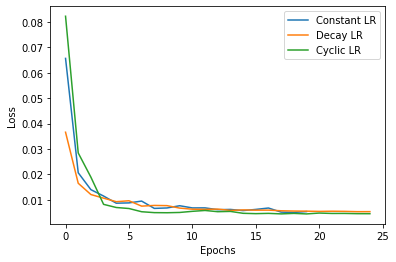

In [ ]:
plt.plot(np.arange(len(hist1.history['val_loss'])), hist1.history['val_loss'])
plt.plot(np.arange(len(hist2.history['val_loss'])), hist2.history['val_loss'])
plt.plot(np.arange(len(hist3.history['val_loss'])), hist3.history['val_loss'])

plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(['Constant LR','Decay LR', 'Cyclic LR'])
plt.show()

# Hyperparameter Tuning 2

In [ ]:
#Librerías necesarias
!pip install keras_tuner -q

import numpy as np
import keras_tuner as kt
from tensorflow                  import keras
from tensorflow.keras.layers     import *
from tensorflow.keras.optimizers import *
from tensorflow.keras.utils      import to_categorical
from tensorflow.keras            import Sequential
from sklearn.model_selection     import train_test_split
from tensorflow.keras.callbacks import EarlyStopping

# Cargamos el dataset MNIST.
mnist = np.genfromtxt('./sample_data/mnist_train_small.csv', delimiter=',')

# Separamos las etiquetas de las imágenes
X = mnist[:, 1:]
Y = mnist[:, 0:1]

# Escalamos los datos y codificamos con One-Hot Encoding el output.
Xn = X / 255
Yn = to_categorical(Y)

# Usamos el divisor de datos de Sklearn para train/test
from sklearn.model_selection import train_test_split

# Partición train/test split para supervisar el overfitting.
X_train, X_test, Y_train, Y_test = train_test_split(Xn, Yn, test_size=0.3)

     |████████████████████████████████| 133 kB 5.0 MB/s 


In [ ]:
#Función que construye los modelos de manera aleatoria con los valores que les pasemos.
def build_model(hp):

  # Creamos el modelo.
  model = Sequential()

  # Creamos tantas capas como se decida en mlp_layers.
  for i in range(hp.Int("mlp_layers", 1, 3)):

    # Creamos tantas neuronas por capa como se decida en units_l.
    model.add(Conv2D(hp.Int(f"filters_{i}", 3, 7, step=2), kernel_size=3, padding='SAME', activation=hp.Choice('activation', ["sigmoid", "relu"]), input_shape=(28, 28, 1)))
    model.add(MaxPooling2D())
  # Convertimos a vector los mapas de características.
  model.add(Flatten())
  # Creamos la última capa.
  model.add(Dense(10, activation='softmax')) 

  # Podemos usar también el método Choice para definir un listado de valores de donde elegir automáticamente.
  model.compile(optimizer=Adam(learning_rate=hp.Choice('learning_rate', [0.5, 0.1, 0.05, 0.01, 0.005, 0.001])),
                loss="mse",
                metrics=["acc"])
  
  return model

In [ ]:
hp = kt.HyperParameters()

model = build_model(hp) 
model(X_train.reshape(-1, 28, 28, 1)[:100])    
model.summary()   

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 3)         30        
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 3)        0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 588)               0         
                                                                 
 dense (Dense)               (None, 10)                5890      
                                                                 
Total params: 5,920
Trainable params: 5,920
Non-trainable params: 0
_________________________________________________________________


In [ ]:
tuner = kt.RandomSearch(
    build_model,
    max_trials=100,
    overwrite=True,
    objective="val_acc",
    directory="/tmp/tb")

tuner.search(
    X_train.reshape(-1, 28, 28, 1)[:5000],
    Y_train[:5000],
    validation_split=0.2,
    epochs=25,
)

Trial 100 Complete [00h 00m 17s]
val_acc: 0.8569999933242798

Best val_acc So Far: 0.9710000157356262
Total elapsed time: 00h 31m 33s
INFO:tensorflow:Oracle triggered exit


In [ ]:
# Configuramos el EarlyStopping.
early_stop = EarlyStopping(monitor="val_acc", patience=3)

#Guardamos el mejor modelo en la variable best_model
best_model = tuner.get_best_models()[0]
# Entrenamos al modelo.
best_model.fit(X_train.reshape(-1, 28, 28, 1), Y_train, validation_data=(X_test.reshape(-1, 28, 28, 1), Y_test), 
               callbacks=[early_stop], epochs=100)

Epoch 1/100
438/438 [==============================] - 3s 6ms/step - loss: 0.0065 - acc: 0.9589 - val_loss: 0.0083 - val_acc: 0.9467
Epoch 2/100
438/438 [==============================] - 3s 6ms/step - loss: 0.0054 - acc: 0.9659 - val_loss: 0.0076 - val_acc: 0.9520
Epoch 3/100
438/438 [==============================] - 3s 6ms/step - loss: 0.0044 - acc: 0.9725 - val_loss: 0.0074 - val_acc: 0.9553
Epoch 4/100
438/438 [==============================] - 2s 5ms/step - loss: 0.0046 - acc: 0.9723 - val_loss: 0.0083 - val_acc: 0.9510
Epoch 5/100
438/438 [==============================] - 3s 6ms/step - loss: 0.0047 - acc: 0.9717 - val_loss: 0.0071 - val_acc: 0.9568
Epoch 6/100
438/438 [==============================] - 2s 5ms/step - loss: 0.0044 - acc: 0.9745 - val_loss: 0.0077 - val_acc: 0.9562
Epoch 7/100
438/438 [==============================] - 3s 6ms/step - loss: 0.0044 - acc: 0.9749 - val_loss: 0.0066 - val_acc: 0.9633
Epoch 8/100
438/438 [==============================] - 2s 6ms/step - 

# Data augmentation

In [ ]:
# Importamos las librerías necesarias.

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import random
from tensorflow.keras.layers     import *
from tensorflow.keras.optimizers import *
from tensorflow.keras.utils      import to_categorical
from tensorflow.keras            import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Importamos el dataset desde el módulo de datasets de Keras.
(X_train, Y_train), (X_test, Y_test) = tf.keras.datasets.fashion_mnist.load_data()

#Escalar los datos
X_train=X_train/255
X_test=X_test/255

#One hot coding para categorizar las variables
Y_train=to_categorical(Y_train)
Y_test=to_categorical(Y_test)

In [ ]:
model = Sequential()
#model.add(Flatten())
model.add(Conv2D(filters=16, kernel_size=3, activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D())
model.add(Conv2D(filters=32, kernel_size=3, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(filters=64, kernel_size=3, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(units=10, activation='softmax')) 

# ---- CONFIGURACIÓN DEL MODELO ---- #
model.compile(optimizer=SGD(learning_rate=0.5), 
              loss="mse",
              metrics=["acc"])

# ---- EARLYSTOPPING ---- #
early_stop = EarlyStopping(monitor="val_acc", patience=3)


# ---- ENTRENAMIENTO DEL MODELO ---- #
model.fit(X_train, Y_train,
                 validation_data=(X_test, Y_test),
                 batch_size=8, callbacks=[early_stop], epochs=20)

In [ ]:
# Generador de traslación
shift_test_gen = ImageDataGenerator(width_shift_range =0.25,
                                    height_shift_range=0.25).flow(X_test.reshape(-1, 28, 28, 1), Y_test)

# Generador de rotación.
rotat_test_gen = ImageDataGenerator(rotation_range=90).flow(X_test.reshape(-1, 28, 28, 1), Y_test)

# Generador de brillo.
bright_test_gen = ImageDataGenerator(brightness_range=(0.1,0.40)).flow(X_test.reshape(-1, 28, 28, 1), Y_test)

In [ ]:
# Recibo imágenes del generador.
batchX, batchY = next(bright_test_gen)

# Visualizamos las imágenes.
idx = 2
plt.matshow(batchX[idx, :, :, 0])
plt.xticks([])
plt.yticks([])
plt.title("Etiqueta: " + str(np.argmax(batchY[idx])))
plt.show()

In [ ]:
print('Traslación:', model.evaluate(shift_test_gen))
print('--------------')
print('Rotación:',   model.evaluate(rotat_test_gen))
print('--------------')
print('Brillo 10-40%:',  model.evaluate(bright_test_gen))

In [ ]:

# Generador de imagenes de entrenamiento con perturbaciones.
augmentated_train_data = ImageDataGenerator(rescale=1./255,
                                            width_shift_range =0.15,
                                            height_shift_range=0.15,
                                            rotation_range=50,
                                            brightness_range=(0.1,0.4)).flow(X_train.reshape(-1, 28, 28, 1), to_categorical(Y_train))


# Generador de imagenes de prueba con perturbaciones.
augmentated_test_data = ImageDataGenerator(rescale=1./255,
                                           width_shift_range =0.15,
                                           height_shift_range=0.15,
                                           rotation_range=50,
                                           brightness_range=(0.1,0.4)).flow(X_test.reshape(-1, 28, 28, 1), to_categorical(Y_test))
                                            

In [ ]:
# Compilamos y configuramos al modelo.
model.compile(optimizer=SGD(learning_rate=0.1),
              loss="mse",
              metrics=["acc"])


In [ ]:
# Entrenamos al modelo.
model.fit(augmentated_train_data, validation_data=augmentated_test_data, callbacks=[early_stop], epochs=50)